## Problem Statement:

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
  
  
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.  


The company wants to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.
  
  
##### The company wants to know:
  
    
- The variables affecting the demands for bike sharing e.g. temp, humidity, weather, working day etc.
  
- To create a linear model that quantitatively relates demand for shared bikes with number of variables such as temp, humidity, weather, working day etc.
  
- the accuracy of the model, i.e. how well these variables can predict bike demands  


##### Goal
 
- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

###### Entire solution is divided in below steps

1. Reading, Understanding and Visualizing Data
2. Preparing the data for modeling (Train- Test split, Rescaling )**
3. Training the Model**
4. Residual Analysis
5. Predictions and Evaluation Test Data

## Step1 : Importing Libraries

In [1]:
#imporitng the required packages

#1. For Data manipulations
import numpy as np
import pandas as pd

#2. For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#3. For data modeling
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Sklearn having library preprocessing that have minmaxscaler library, which is used to do minmax scalling
from sklearn.preprocessing import MinMaxScaler


#4. For Warnings
import warnings
warnings.filterwarnings('ignore')

##  Step 2: Reading Data and Analyzing

In [2]:
bikeSharing_df = pd.read_csv('day.csv')

In [54]:
#Check some rows of data
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [55]:
#Shape of the dataset
bikeSharing_df.shape

(730, 16)

In [56]:
#Info of the dataset
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [57]:
#Describe the data
bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bikeSharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
bikeSharing_df.ndim

2

In [9]:
bikeSharing_df.columns.values

array(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'], dtype=object)

- By the initial analysis of the data set, it shows that it having 730 rows and 16 columns, and not having any null values

####  Drop columns that are not useful for analysis
  
- instant is just a row instance identifier.
- casual and registered variables are not require prediction, target variable cnt = casual + registered.

In [3]:
# Droping instant column as it is index column which has nothing to do with target

bikeSharing_df = bikeSharing_df.drop(['instant'], axis = 1)


# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bikeSharing_df = bikeSharing_df.drop(['casual'], axis = 1, )

bikeSharing_df = bikeSharing_df.drop(['registered'], axis = 1)

In [4]:
#Inspect data frame after dropping
bikeSharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 1.2 Visualizing the data

#### While creating the Linear regresion model, we need to check
  
1. There must have linear relationship between cnt (Traget variable) with atleast some of the independant variables given.
2. Second we want to know whether there having any relationship among the inpdendant variables themselves, if present then there having multicolinearity issue, that we need to handle.

### (A.) Draw pair Plots to check the linear relationship with continuous numerical variables with Target

<Figure size 2500x3000 with 0 Axes>

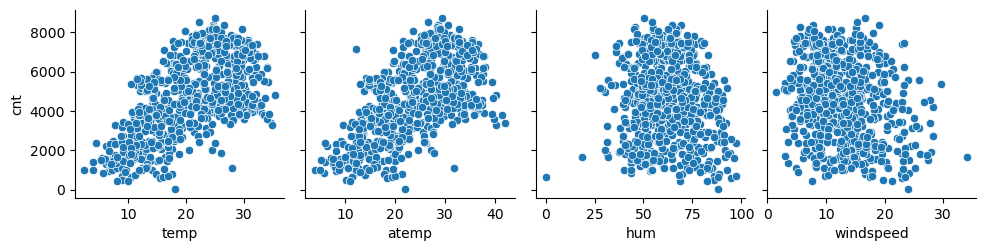

In [12]:
#Draw pairplots for continuous numeric variables with target
plt.figure(figsize = (25,30))
sns.pairplot(data=bikeSharing_df, 
             x_vars=['temp', 'atemp', 'hum','windspeed'],
            y_vars='cnt')

plt.show()

### (B.) Draw pair Plots to check the linear relationship with continuous numerical variables 

<Figure size 2500x3000 with 0 Axes>

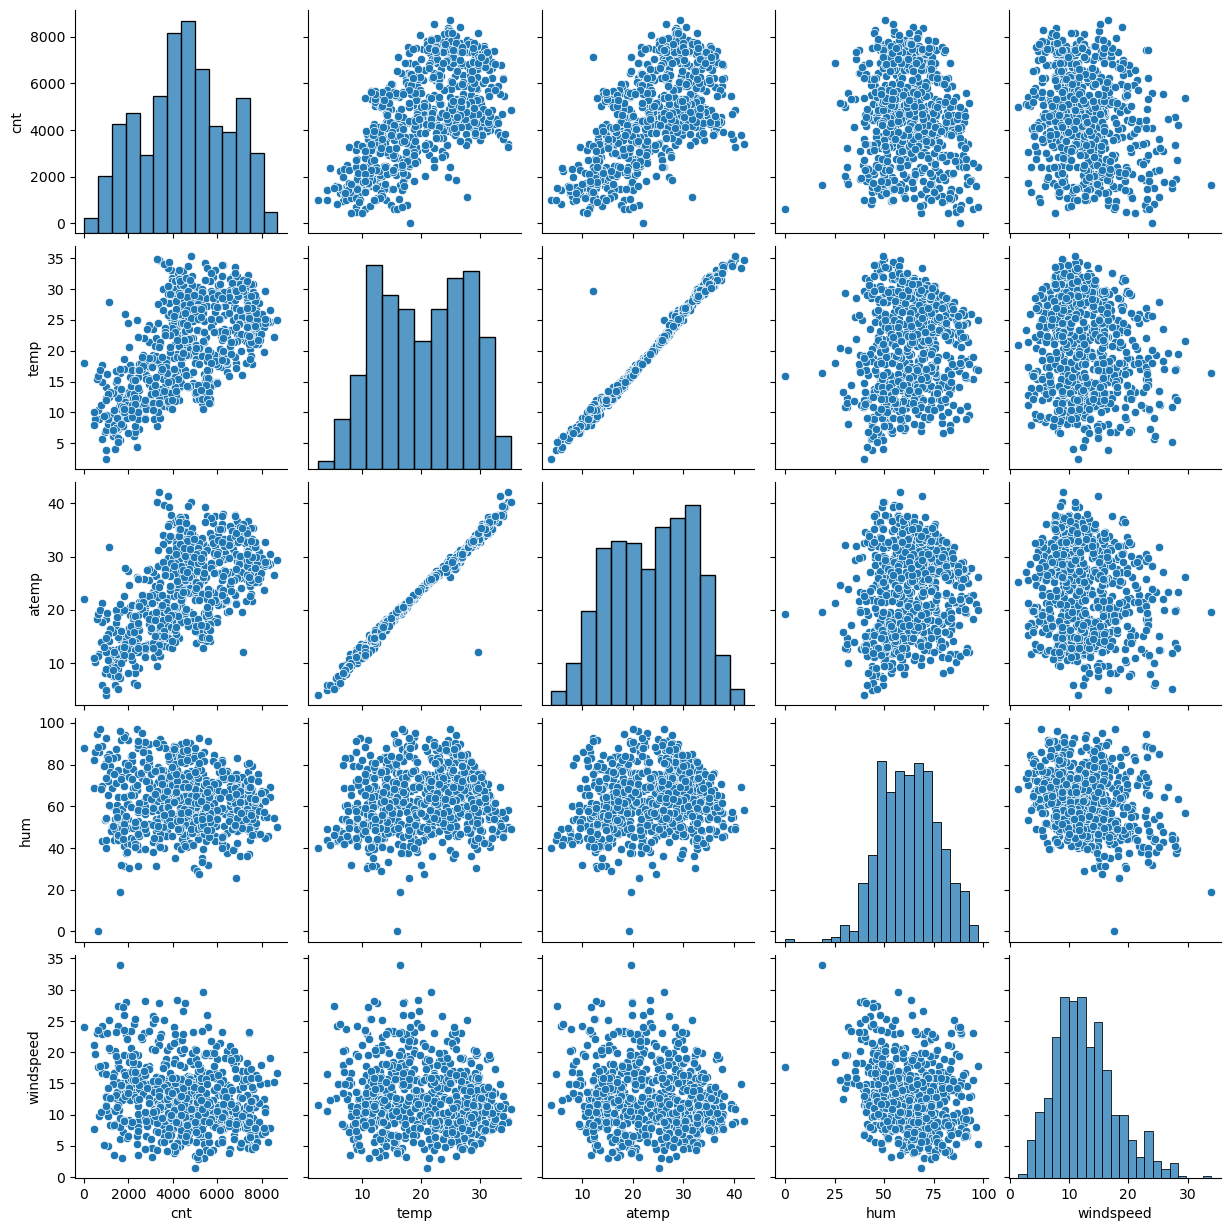

In [13]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (25,30))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Insights:
  
- Above graphs shows that temp and atemp has the highest corelation with the target variable cnt
- Also temp and atemp are highly co-related with each other

#### Visualising the Data to Find the Correlation between the Numerical Variable

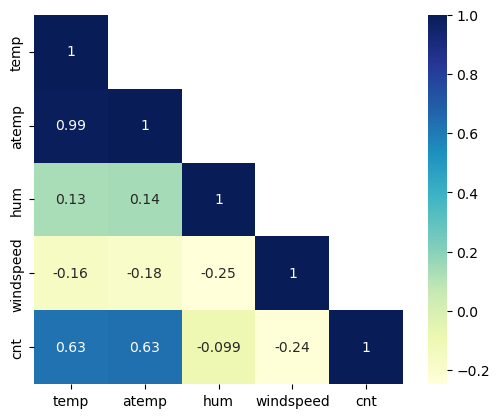

In [6]:
# Checking correlation among continuous variables

mask = np.array(bikeSharing_df[['temp','atemp','hum','windspeed','cnt']].corr())
mask[np.tril_indices_from(mask)] = False

sns.heatmap(bikeSharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), mask=mask, square=True, cmap="YlGnBu", annot=True);


#### Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) we need to drop this variable atemp, because its seems derived variable (feeling temperature in Celsius- from data dictionary)

#### Draw Heatmap of correlation between variables

In [8]:
#Calculate Correlation
corr = bikeSharing_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'cnt']].corr()
corr

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


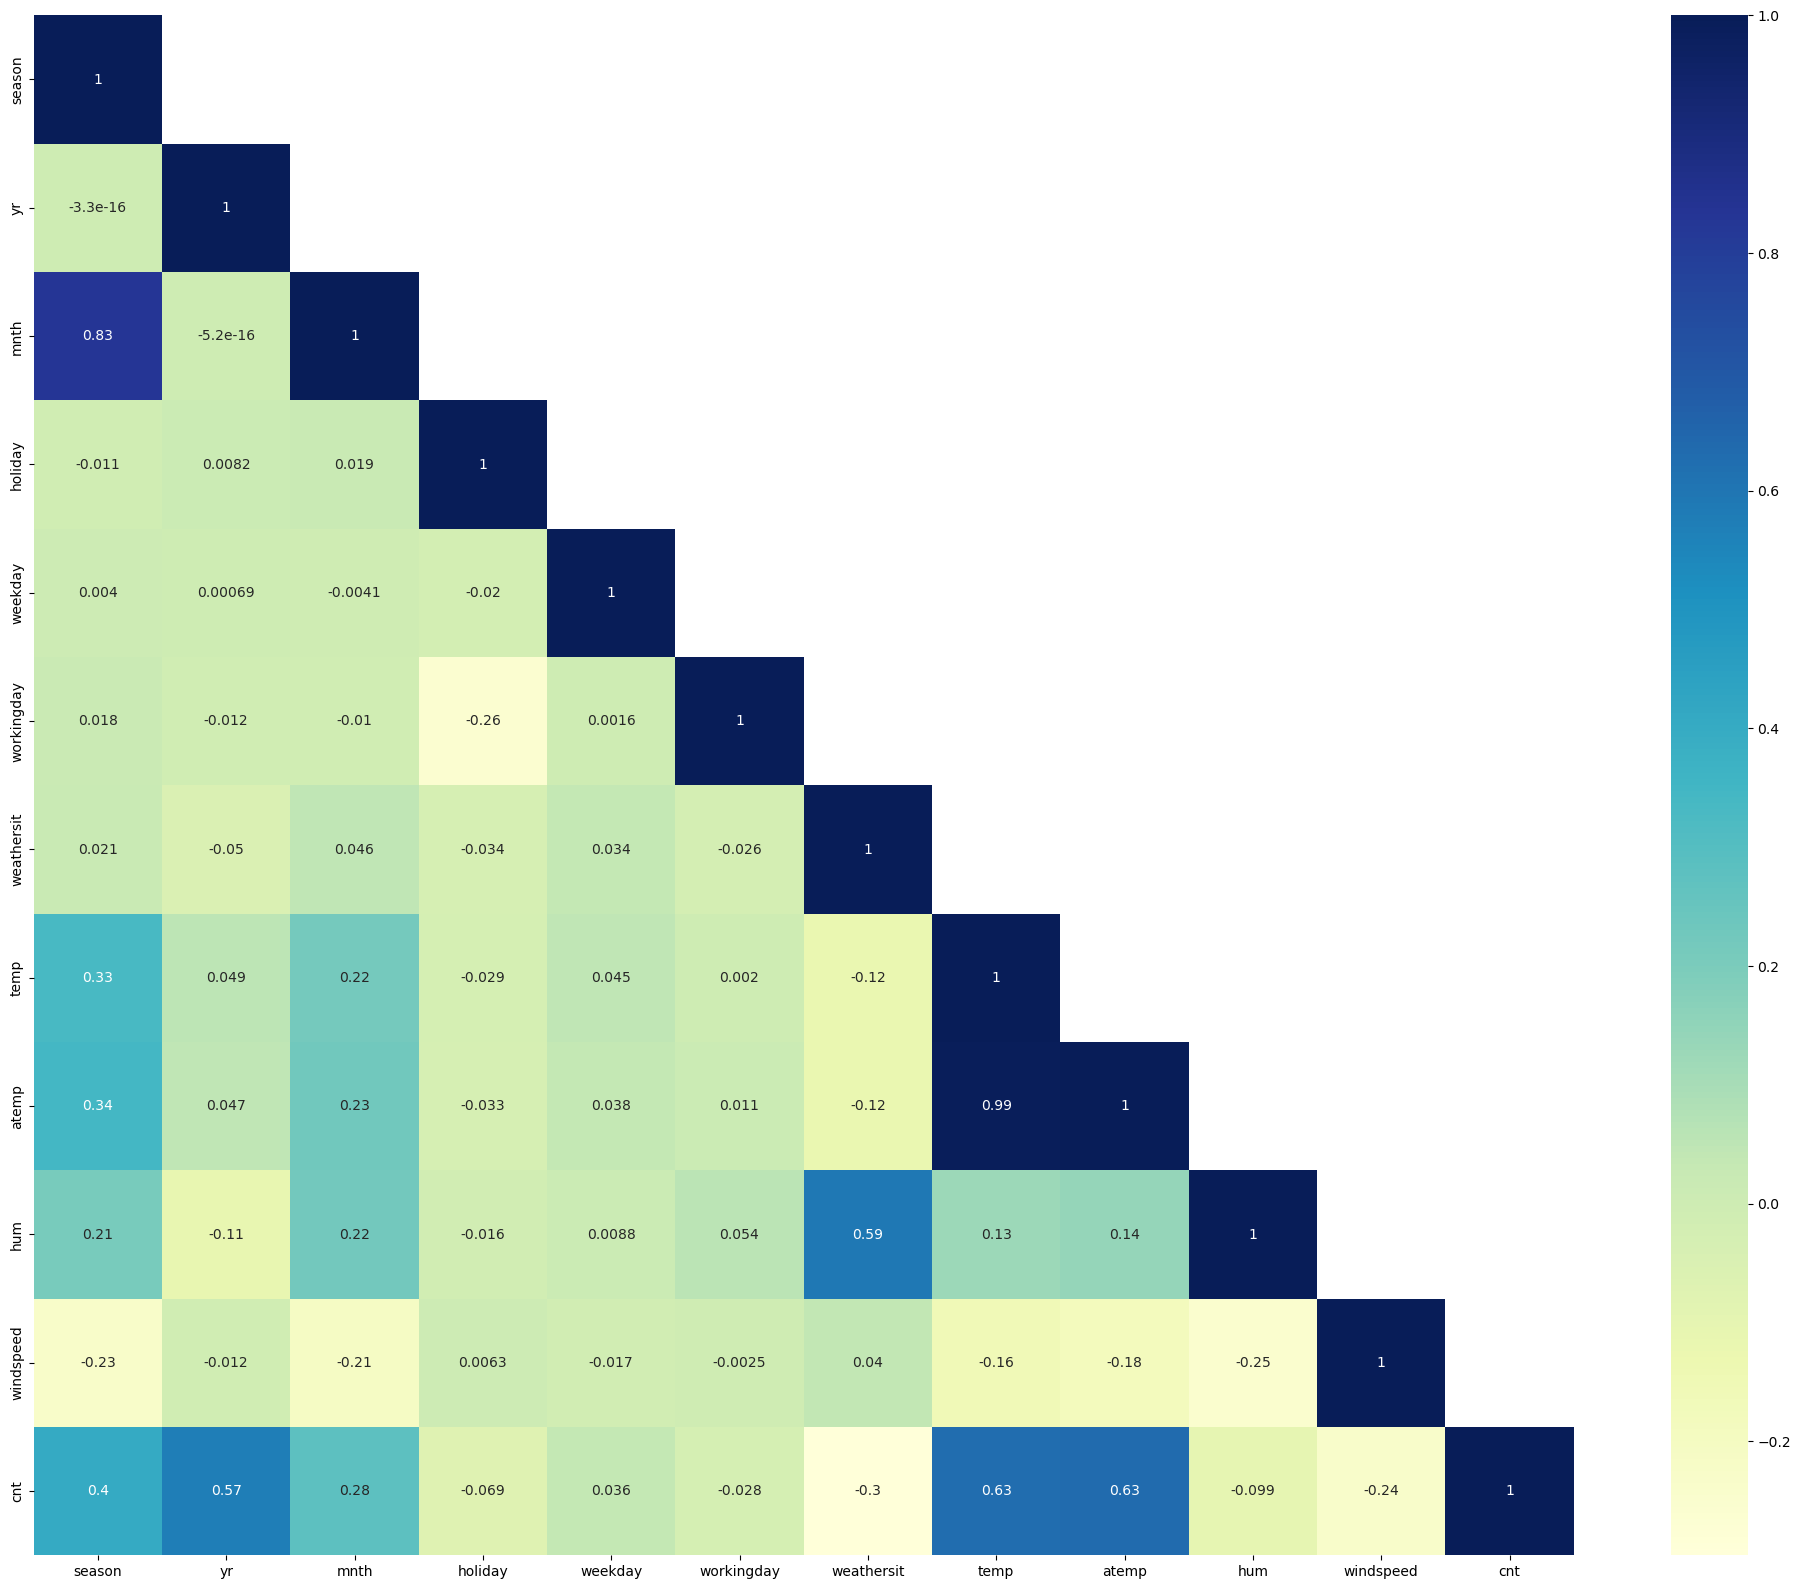

In [9]:
plt.figure(figsize=(25,20))

mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(corr, mask=mask, square=True, cmap="YlGnBu", annot=True);


#### Insights
 
#### From the correlation map, temp, atemp  seems to be highly correlated and only one variable out of these two can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
  
#### We also see Target variable has a linear relationship with some of the indeptendent variables. It is a good sign that we can for building a linear regression Model.

## Step 2 . Preparing the Data for Modeling

- Encoding

        - Convert binary categoricals variables to 1/0, if having any.
        - Other categoricals variable to dummy variables
          
- Spliting into Train and Test
- Rescalling of Variables


### 2.1 Encoding

In [6]:
#View the data again
bikeSharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Bike dataset does not having categorical column of yes/no type, so need not to do this conversion here

- Now we have dteday - date column, actually we have month and yr column, so this is redundant column, we need to extract the day from the date column, then we can use this information in model building. 

In [4]:
bikeSharing_df['days_back'] = (pd.to_datetime(bikeSharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [5]:
# Dropping dteday as we have already have month and weekday columns to work with

bikeSharing_df = bikeSharing_df.drop(['dteday'], axis = 1)

In [9]:
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_back
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [9]:
bikeSharing_df['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [6]:
# season : season (1:spring, 2:summer, 3:fall, 4:winter)

# Defining the conversion function
def get_season(x):
    if x==1:
        return "spring"
    elif x==2:
        return "summer"
    elif x==3:
        return "fall"
    else:
        return "winter"



# Applying the function to the season column of the dataset
bikeSharing_df['season'] = bikeSharing_df['season'].apply(get_season)


In [11]:
bikeSharing_df['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [12]:
bikeSharing_df['weekday'].value_counts()

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

In [7]:
# weekday : day of the week : As nothing is given for weekday, so we are assuming 
# that 0 : sun, 1: mon, 2: tue, 3: wed, 5: thu 5: Fri, 6: sat

# Defining the conversion function
def get_weekday(x):
    if x==0:
        return "sun"
    elif x==1:
        return "mon"
    elif x==2:
        return "tue"
    elif x==3:
        return "wed"
    elif x==4:
        return "thu"
    elif x==5:
        return "fri"
    else:
        return "sat"



# Applying the function to the weekday column of the dataset
bikeSharing_df['weekday'] = bikeSharing_df['weekday'].apply(get_weekday)


In [14]:
bikeSharing_df['weekday'].value_counts()

weekday
mon    105
tue    105
wed    104
thu    104
fri    104
sat    104
sun    104
Name: count, dtype: int64

In [15]:
bikeSharing_df['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [8]:
# + weathersit : - 1: Clear, - 2: Mist, - 3: Light Snow, - 4: Heavy Rain 

# Defining the conversion function
def get_weathersit(x):
    if x==1:
        return "clear"
    elif x==2:
        return "mist"
    elif x==3:
        return "lightsnow"
    else:
        return "heavyrain"



# Applying the function to the weekday column of the dataset
bikeSharing_df['weathersit'] = bikeSharing_df['weathersit'].apply(get_weathersit)


In [17]:
bikeSharing_df['weathersit'].value_counts()

weathersit
clear        463
mist         246
lightsnow     21
Name: count, dtype: int64

##### Insight

- Weather column shows only three value (1: Clear, 2: Mist , - 3: Light Snow) not having any value for fourth option : 4: Heavy Rain 

In [18]:
bikeSharing_df['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [9]:
# mnth : month ( 1 to 12) : as per data dictionary

# Defining the conversion function
def get_mnth(x):
    if x==1:
        return "jan"
    elif x==2:
        return "feb"
    elif x==3:
        return "mar"
    elif x==4:
        return "apr"
    elif x==5:
        return "may"
    elif x==6:
        return "jun"
    elif x==7:
        return "jul"
    elif x==8:
        return "aug"
    elif x==9:
        return "sep"
    elif x==10:
        return "oct"
    elif x==11:
        return "nov"
    else:
        return "dec"



# Applying the function to the month column of the dataset
bikeSharing_df['mnth'] = bikeSharing_df['mnth'].apply(get_mnth)


In [20]:
bikeSharing_df['mnth'].value_counts()

mnth
jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: count, dtype: int64

In [21]:
bikeSharing_df['yr'].value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [22]:
bikeSharing_df['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [23]:
bikeSharing_df['workingday'].value_counts()

workingday
1    504
0    226
Name: count, dtype: int64

##### Insight
 
- Other than season, mnth, weekday, weathersit other categorical variables/features i.e. yr, holiday, workingday having value already in 0 and 1 format. 
  
- We need to get dummy variables for season, mnth, weekday, weathersit
 
- Since yr, holiday, workingday already in 0 and 1 form, so we need to do any conversion for these columns.

### (C) Visualising Categorical Variables

Dataset having few categorical variables as well. Let's make a boxplot for some of these variables.

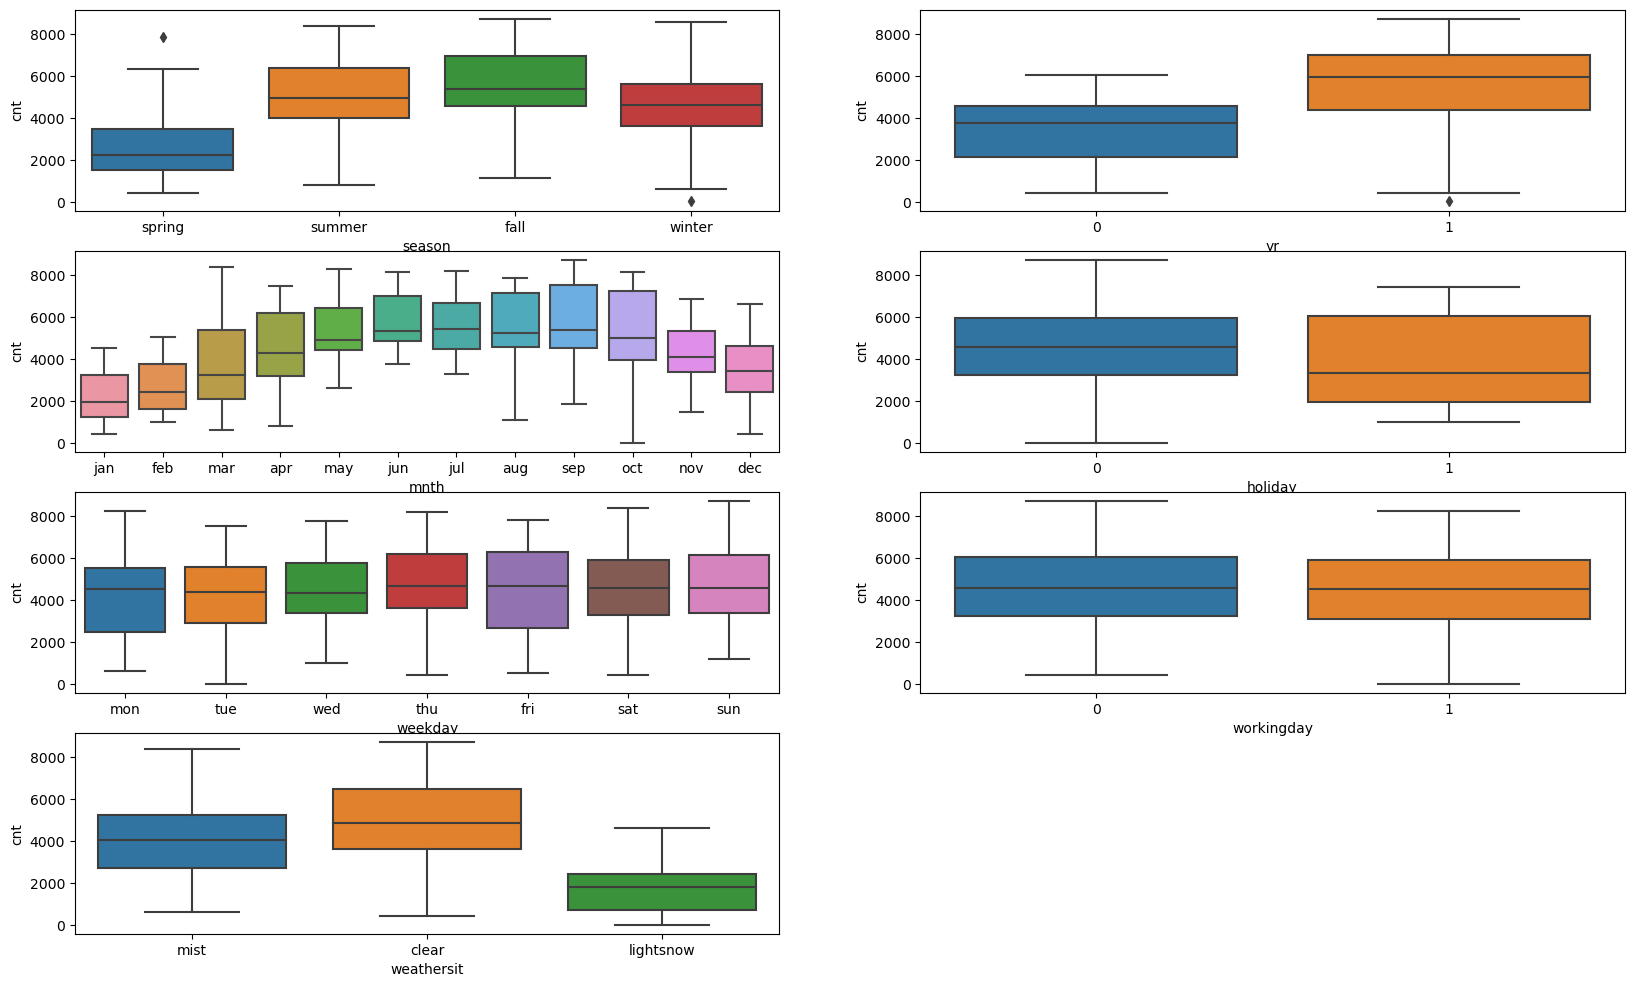

In [14]:
plt.figure( figsize= ( 20, 12 ) )
plt.subplot(4, 2, 1)
sns.boxplot( x= "season" , y = "cnt", data=bikeSharing_df)

plt.subplot(4, 2, 2)
sns.boxplot( x= "yr" , y = "cnt", data=bikeSharing_df)

plt.subplot(4, 2, 3)
sns.boxplot( x= "mnth" , y = "cnt", data=bikeSharing_df)

plt.subplot(4, 2, 4)
sns.boxplot( x= "holiday" , y = "cnt", data=bikeSharing_df)

plt.subplot(4, 2, 5)
sns.boxplot( x= "weekday" , y = "cnt", data=bikeSharing_df)


plt.subplot(4, 2, 6)
sns.boxplot( x= "workingday" , y = "cnt", data=bikeSharing_df)


plt.subplot(4, 2, 7)
sns.boxplot( x= "weathersit" , y = "cnt", data=bikeSharing_df)


plt.show()

#### Insights

- There showing relationship between categorical features say season, working days and holidays etc. having some relationship with the target variable **'cnt'**.
- Also data does not have any outliers 

### 2.2  Dummy  Variables

- Convert all categorical features say Season, Month, Weekday, Weathersit into dummy variables

In [10]:
bikeSharing_df.columns.values

array(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'days_back'], dtype=object)

#####  We donot need all the four column, we can drop the spring , becuase the this can be obtained from last three columns

- 000 - corresponds to fall
- 100 - corresponds to Spring
- 010 - corresponds to summer
- 001 - corresponds to winter

In [11]:
#season : season (1:spring, 2:summer, 3:fall, 4:winter)

season_dummies = pd.get_dummies(bikeSharing_df['season'], drop_first = True)

season_dummies = season_dummies.astype(int)

season_dummies.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#####  Month

- 00000000000 - Apr
- 00010000000 - jan like this


In [12]:
#mnth : month ( 1 to 12)

month_dummies = pd.get_dummies(bikeSharing_df['mnth'], drop_first = True)

month_dummies = month_dummies.astype(int)


month_dummies.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


##### Mnth

- 000000 : fri
- 100000 : MOn

In [13]:
#Weekday : day of the week

weekday_dummies = pd.get_dummies(bikeSharing_df['weekday'], drop_first = True)

weekday_dummies = weekday_dummies.astype(int)


weekday_dummies.head()

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


##### Weathersit

- 000 : heavyrain
- 100 : clear

In [14]:
#weathersit : 
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


weathersit_dummies = pd.get_dummies(bikeSharing_df['weathersit'])

weathersit_dummies = weathersit_dummies.astype(int)


weathersit_dummies.head()

,clear,lightsnow,mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


##### Concate the dummy df with the original one

In [15]:
# season

bikeSharing_df = pd.concat([bikeSharing_df, season_dummies], axis = 1)

In [16]:
# mnth

bikeSharing_df = pd.concat([bikeSharing_df, month_dummies], axis = 1)

In [17]:
# weekday

bikeSharing_df = pd.concat([bikeSharing_df, weekday_dummies], axis = 1)

In [18]:
# weathersit

bikeSharing_df = pd.concat([bikeSharing_df, weathersit_dummies], axis = 1)

#### Drop the extra columns season, mnth, weekday, weathersit


In [19]:
var_list = ['season', 'mnth', 'weekday', 'weathersit']

bikeSharing_df = bikeSharing_df.drop(var_list, axis = 1)

In [23]:
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_back,spring,...,sep,mon,sat,sun,thu,tue,wed,clear,lightsnow,mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,1,0,0


In [24]:
bikeSharing_df.columns.values

array(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_back', 'spring', 'summer', 'winter', 'aug', 'dec',
       'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'clear', 'lightsnow',
       'mist'], dtype=object)

## Step 4: Splitting the Data into Training and Testing Sets

### 4.1 Spliting into Train Test

In [20]:
# Split the data in 70, 30 ratio

df_train, df_test = train_test_split(bikeSharing_df, train_size=0.7, random_state=100)

In [21]:
#Check the size of both the dataset

print(df_train.shape)
print(df_test.shape)

(510, 32)
(220, 32)


In [27]:
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_back,spring,...,sep,mon,sat,sun,thu,tue,wed,clear,lightsnow,mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,1,0,0


### 4.2 Rescaling the Features 

Here we can see that except for `temp`,`atemp`,`hum`,`windspeed`,`cnt` all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is necessary to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [ ]:
# X : vector
# Normalization (x - xmin ) / (xmax - xmin) : minmax method take care of outlier, 
# but it compressed the data point between 0 and i, hence not having much spread like orginal data point


# Standarization (x - mu)/sigma : It does not take care of outlier, but it having some short of that spread as it have in original dataset

In [28]:
# Steps for many of the classes in sklearn is

# 1. Instantiate the object of that class, in our case it is MinMaxScaler
scaler = MinMaxScaler()

# 2. fit the object, in our case it is minmaxscalling, for that also sklearn comes with various form of fit functions, they are
# a. fit() : This function calaculate the min and max value from the dataset
# b. transform() : Actually transform, doing the scalling thing ( i.e. ( x - xmin)/ ( xmax - xmin) )
# c. fit_transform() : this function do both the fit and transform() functionality simultaneously

# Secondly while scaling through minmax method we donot want to sacle all the categorical variables ( having value 0 and 1), 
# we want to scale numeric variables like (temp, atemp, hum, cnt, days_back ), 
# so we make the list of those columns

# make a list of num_vars
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_back']

# Now we divide the train dataset with this list of variable, and use that to scale using fit_transform() function

df_train[ num_vars ] = scaler.fit_transform( df_train[ num_vars ] )

In [29]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_back,spring,...,sep,mon,sat,sun,thu,tue,wed,clear,lightsnow,mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.791209,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.585165,1,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1.000000,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.662088,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0.152473,0,...,0,0,0,1,0,0,0,0,0,1


In [30]:
df_train[ num_vars ].describe()

,temp,atemp,hum,windspeed,cnt,days_back
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499,0.505055
std,0.225858,0.212410,0.145846,0.169803,0.224421,0.287907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.255838
50%,0.542596,0.529718,0.653714,0.296763,0.518638,0.510989
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.757898
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Insight

- Now we found that minmax scaler compressed the all numeric variables (temp, atemp, hum, windspeed, cnt, days_back to within 0 and 1
- min : zero and max : 1

## Training Model

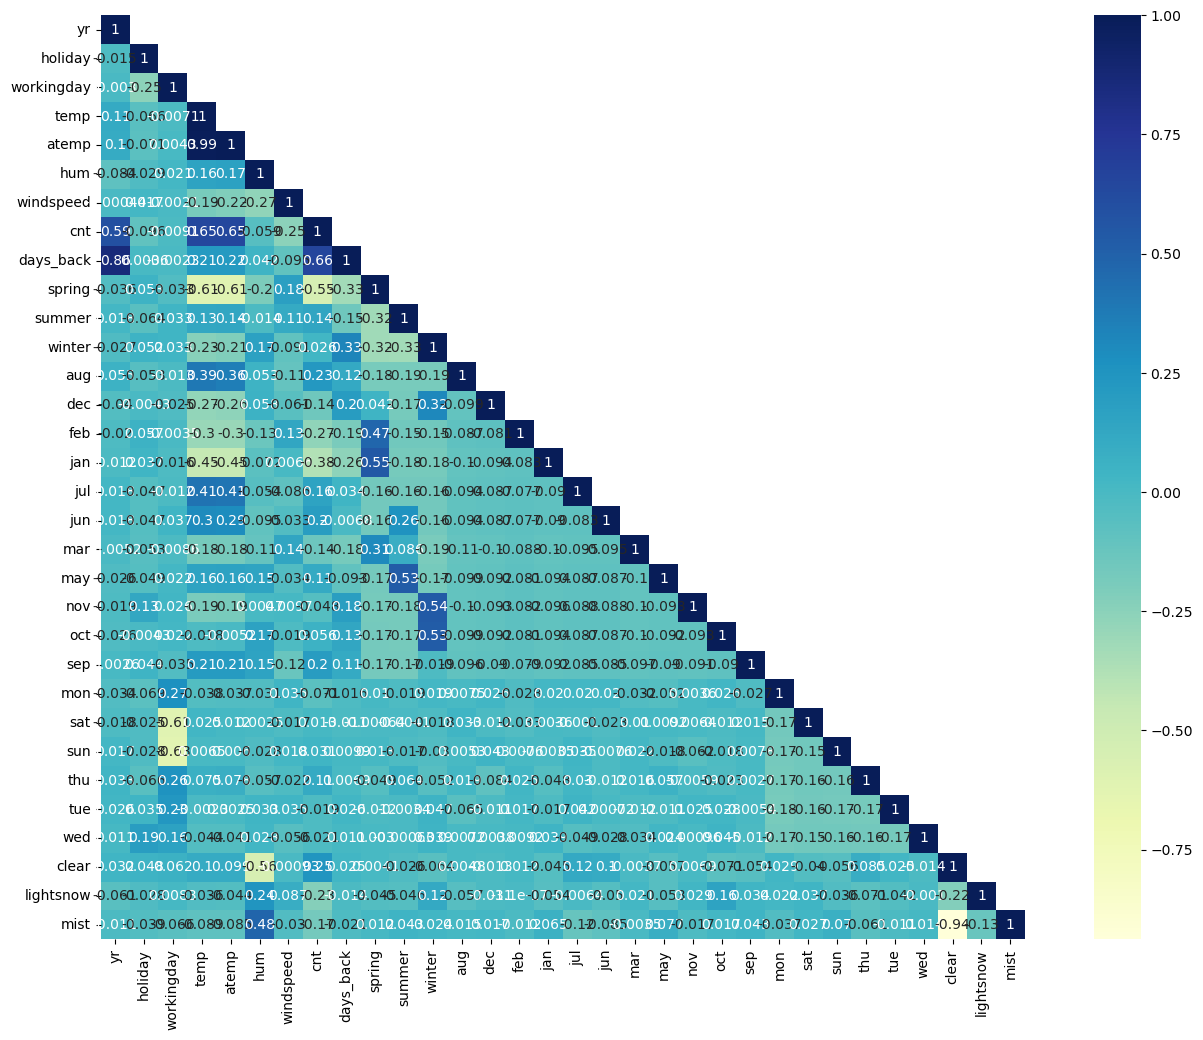

In [47]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (18, 12))
mask = np.array(df_train.corr())
mask[np.tril_indices_from(mask)] = False

sns.heatmap(df_train.corr(), mask=mask, square=True, annot=True, cmap="YlGnBu");


- Because temp having highest correlation with cnt, lets see the pair plot for temp vs cnt 

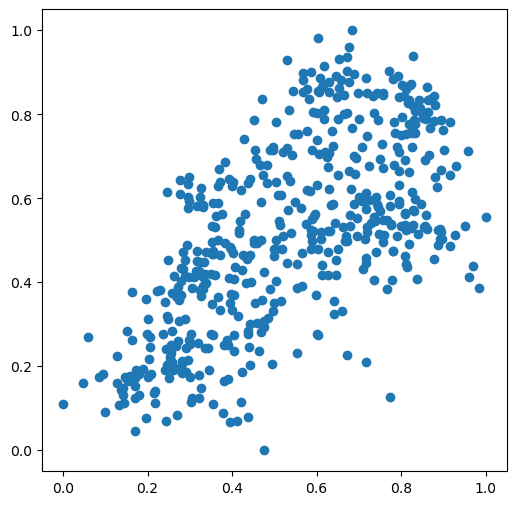

In [98]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

- Because temp having highest correlation with cnt, we choose this column for our initial model building

### Dividing into X and Y sets for the model building

In [31]:
# for this we create x and Y column with x_train df, our X = all the column except tmp, and Y = temp column

y_train = df_train.pop('cnt') # it delete the column cnt from the df_train(in place) and assign to y_train,


In [32]:
#  remaining all columns
X_train = df_train

In [33]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_back,spring,summer,...,sep,mon,sat,sun,thu,tue,wed,clear,lightsnow,mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.152473,0,1,...,0,0,0,1,0,0,0,0,0,1


## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. In case of `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

- Statistical Significance of the variables
- VIF

### Model 1

In [34]:
X_train_sm = sm.add_constant( X_train['temp'] )

#Create first model
lr = sm.OLS( y_train, X_train_sm )

# fit the model
lr_model = lr.fit()

In [35]:
# Check the parameters obtained

lr_model.params

const    0.169031
temp     0.640944
dtype: float64

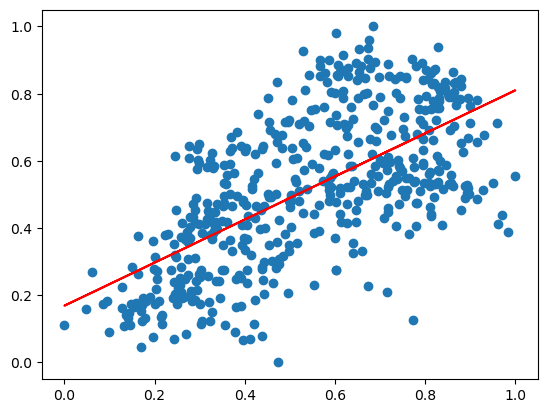

In [104]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.169031 + 0.640944*X_train_sm.iloc[:, 1], 'r')
plt.show()

In [36]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           2.46e-61
Time:                        23:59:11   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Insight
 
- This model having r-square value 41%
- p- value is 0.000

## Build a Model using RFE and Automated approach

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [37]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [38]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
#Cut down number of features to 14 using automated approach
# rfe = RFE(lr, 14)
rfe = RFE(estimator=lr, n_features_to_select=14)


In [40]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=14)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_back', True, 1),
 ('spring', False, 8),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', True, 1),
 ('dec', False, 15),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', False, 13),
 ('jun', False, 10),
 ('mar', False, 18),
 ('may', False, 9),
 ('nov', False, 16),
 ('oct', False, 3),
 ('sep', True, 1),
 ('mon', False, 12),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 17),
 ('tue', False, 11),
 ('wed', False, 14),
 ('clear', True, 1),
 ('lightsnow', True, 1),
 ('mist', True, 1)]

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_back', 'summer',
       'winter', 'aug', 'jan', 'sep', 'clear', 'lightsnow', 'mist'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'spring', 'dec', 'feb', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

### Model 2

In [44]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [45]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,days_back,summer,winter,aug,jan,sep,clear,lightsnow,mist
576,1,0,0.815169,0.725633,0.264686,0.791209,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0.585165,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1.000000,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0.662088,1,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0.152473,1,0,0,0,0,0,0,1


In [46]:
# Adding a constant variable 
  
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,days_back,summer,winter,aug,jan,sep,clear,lightsnow,mist
576,1.0,1,0,0.815169,0.725633,0.264686,0.791209,0,0,0,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0.585165,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1.000000,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0.662088,1,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,0.152473,1,0,0,0,0,0,0,1


In [48]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [49]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.2
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.66e-189
Time:                        00:00:18   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     496   BIC:                            -933.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1185      0.025      4.689      0.0

#### Check VIF

In [50]:
col


Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_back', 'summer',
       'winter', 'aug', 'jan', 'sep', 'clear', 'lightsnow', 'mist'],
      dtype='object')

In [51]:
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,clear,33.04
13,mist,24.33
5,days_back,15.86
0,yr,12.70
12,lightsnow,3.53
7,winter,3.44
2,temp,2.09
3,hum,1.87
9,jan,1.86
6,summer,1.54


##### Insights

- R-square of the model increased to 84% and adj. R square is 83%, which is good
- p-value of day_back feature is .046 and jan is .029, rest all features having p-value <.005
- coefficients of some features having -ve value say( holiday, winspeed, hum), which shows that it negatively impact on demands
- VIF of some features like clear, yr, mist, days_back is very high, which denotes the multicolinearity with these features

### Manual elimination of features

In [52]:
#Function to build a model using statsmodel api with selected features
def build_model(cols):
    X_train_lm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
    print(lm.summary())
    return lm

In [53]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Model 3

- Remove clear features, which having high VIF of 33.04

In [54]:
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_back', 'summer',
       'winter', 'aug', 'jan', 'sep', 'lightsnow', 'mist']
build_model(cols)
print('\n\n')
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.2
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.66e-189
Time:                        00:01:25   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     496   BIC:                            -933.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2549      0.029      8.780      0.0

### Model 4

- Remove days_back feature, having high VIF value

In [55]:
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed',  'summer',
       'winter', 'aug', 'jan', 'sep', 'lightsnow', 'mist']
build_model(cols)
print('\n\n')
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.4
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.44e-190
Time:                        00:01:37   Log-Likelihood:                 510.03
No. Observations:                 510   AIC:                            -994.1
Df Residuals:                     497   BIC:                            -939.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2497      0.028      8.871      0.0

### Model 5

- Remove hum feature having high VIF 

In [56]:
cols = ['yr', 'holiday', 'temp',  'windspeed',  'summer',
       'winter', 'aug', 'jan', 'sep', 'lightsnow', 'mist']
build_model(cols)
print('\n\n')
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.3
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          2.65e-187
Time:                        00:01:50   Log-Likelihood:                 499.46
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     498   BIC:                            -924.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1550      0.020      7.942      0.0

### Model 6

- After removing hum, which having VIF value, model r square value come down to .836 from .842, 
- Remove jan month, which is less significance among other features 

In [57]:
cols = ['yr', 'holiday', 'temp',  'windspeed',  'summer',
       'winter', 'aug',  'sep', 'lightsnow', 'mist']
build_model(cols)
print('\n\n')
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          2.62e-187
Time:                        00:02:21   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1307      0.017      7.837      0.0

### Model 7

- After removing jan month, though r-square little reduced, but vif of some features like temp came down, 
- so again we remove feature say aug on basis of its less significance among all features 

In [58]:
cols = ['yr', 'holiday', 'temp',  'windspeed',  'summer',
       'winter',  'sep', 'lightsnow', 'mist']
build_model(cols)
print('\n\n')
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          2.83e-186
Time:                        00:02:33   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1259      0.017      7.508      0.0

### Inferences

- Here VIF seems to be almost accepted. p-value for all the features is 0.0 and R2 is 0.830
- Let us select Model 7 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables.
- Difference between R-squared and Adjusted R-squared values for this model is very less(.830 and .827 respectively), which also means that there are no additional parameters that can be removed from this model.

In [59]:
#Build a model with all columns to select features automatically
def build_Final_Model(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [60]:
#Let us build the final model using sklearn
cols = ['yr', 'holiday', 'temp',  'windspeed',  'summer',
       'winter',  'sep', 'lightsnow', 'mist']

#Build a model with above columns
lr = build_Final_Model(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

0.12592584330857526 [ 0.23286073 -0.09868539  0.54800759 -0.15324618  0.08808036  0.1293451
  0.10119495 -0.28286936 -0.07837453]


## Step 4. Predicting and Evaluating Model

### 4.1 Residual Analysis

In [61]:
y_train_pred = lr.predict(X_train[cols])

In [62]:
#Plot a histogram of the error terms
def plot_residual_dist_plot(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

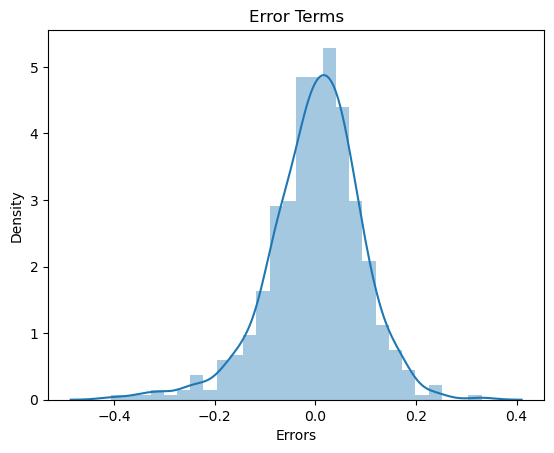

In [63]:
plot_residual_dist_plot(y_train, y_train_pred)

### Errors are normally distribured here with mean 0. So everything seems to be fine

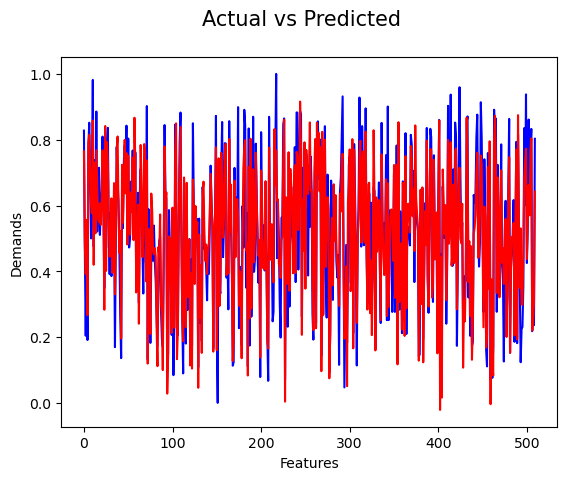

In [64]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Features')
plt.ylabel('Demands')
plt.show()

### Actual and Predicted result following almost the same pattern so this model seems ok

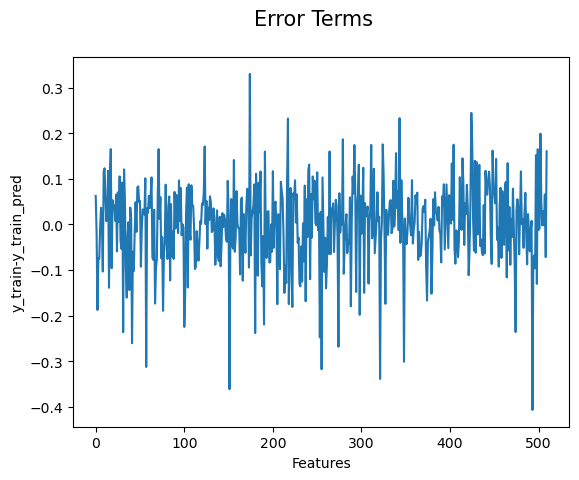

In [65]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Features')
plt.ylabel('y_train-y_train_pred')
plt.show()

### Here,If we see the error terms are independent of each other.

In [66]:
#Print R-squared Value for train data set
r2_score(y_train,y_train_pred)

0.8303450237489228

### inference

#### R2 Same as we obtained for our final model

###  Linearity Check (For Train Data set)

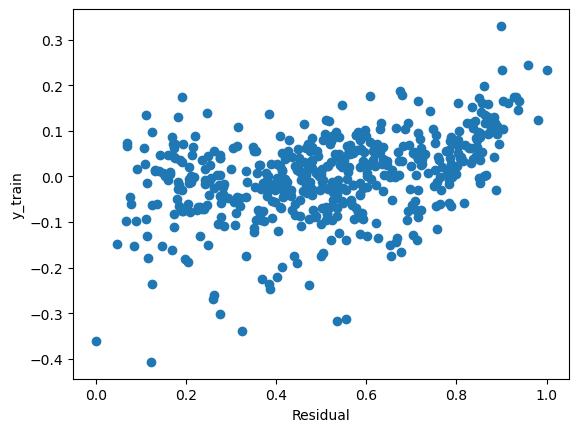

In [67]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

##  Predict values for test data set

In [68]:
#Scale variables in X_test
# num_vars = ['temp','atemp','hum','windspeed','cnt', days_back']

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_back']

#Test data to be transformed only, no fitting

df_test[ num_vars ] = scaler.transform( df_test[ num_vars ] )

In [69]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_back,spring,...,sep,mon,sat,sun,thu,tue,wed,clear,lightsnow,mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0.252747,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0.734890,0,...,0,0,0,0,1,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0.410714,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0.303571,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0.208791,0,...,0,0,1,0,0,0,0,1,0,0


In [70]:
df_test[ num_vars ].describe()

,temp,atemp,hum,windspeed,cnt,days_back
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154,0.490559
std,0.233187,0.217401,0.148694,0.159584,0.219163,0.294116
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.004121
25%,0.355429,0.344870,0.529197,0.198843,0.378595,0.234203
50%,0.558172,0.544652,0.625590,0.300126,0.524678,0.480082
75%,0.755981,0.713308,0.743798,0.402718,0.677750,0.740041
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.001374


#### Insight

- We found this time test data not scaled exact min at zero
- Not exact max at 1.

In [71]:
# for this we create x and Y column with x_train df, our X = all the column except tmp, and Y = temp column

y_test = df_test.pop('cnt') # it delete the column cnt from the df_train(in place) and assign to y_train,

In [72]:
#  remaining all columns
X_test = df_test

In [73]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_back,spring,summer,...,sep,mon,sat,sun,thu,tue,wed,clear,lightsnow,mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.252747,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.734890,0,1,...,0,0,0,0,1,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.410714,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.303571,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.208791,0,1,...,0,0,1,0,0,0,0,1,0,0


In [74]:
#Columns from our final model
# cols = ['yr', 'season_spring', 'mnth_jul',
#         'season_winter', 'mnth_sept', 'weekday_sun',
#        'weathersit_bad', 'weathersit_moderate', 'temp']


cols = ['yr', 'holiday', 'temp',  'windspeed',  'summer',
       'winter',  'sep', 'lightsnow', 'mist']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

## R-Squared value for test predictions

In [75]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7941977535477245

### Inference

##### R2 value for predictions on test data (0.794) is almost same as R2 value of train data(0.830). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

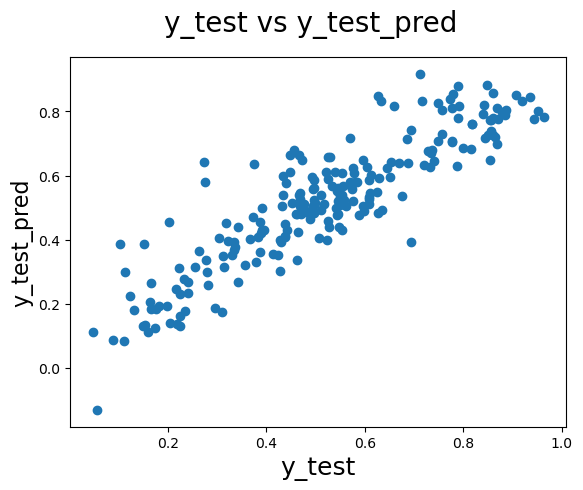

In [76]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

### Inference

#### We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

### Plot Test vs Predicted test values

In [77]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred_values(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label


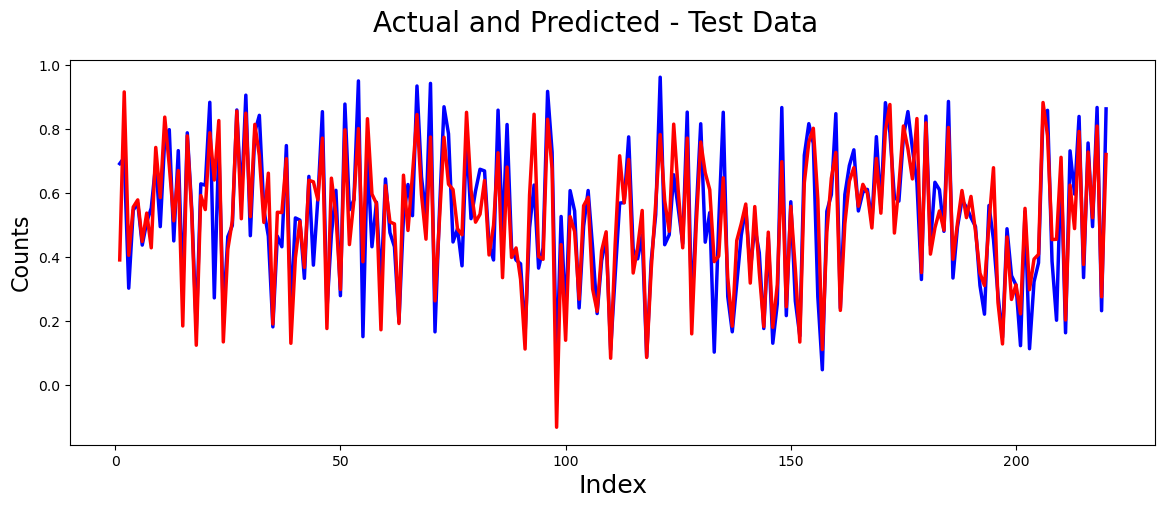

In [78]:
#Plot Actual vs Predicted for Test Data
plot_act_pred_values(y_test,y_test_pred,len(y_test)+1,'Test Data')

### Inference

##### As we can see predictions for test data is very close to actuals

## Plot Error Terms for test data

In [79]:
# Error terms
def plot_err_terms_for_test(act,pred):
    c = [i for i in range(1,len(y_test)+1,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Features', fontsize=18)                      # X-label
    plt.ylabel('Predicted Counts', fontsize=16)                # Y-label

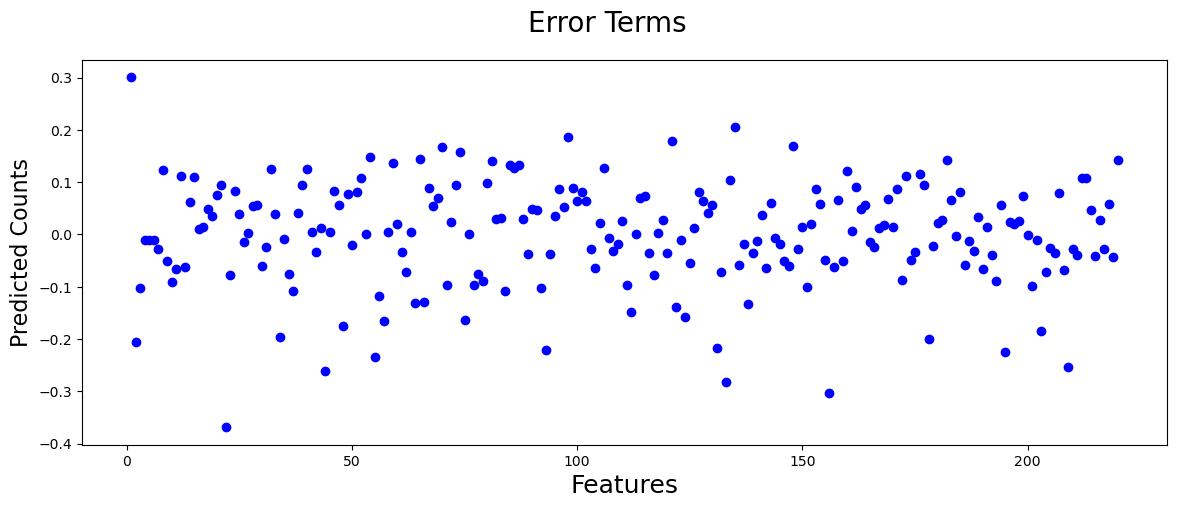

In [80]:
#Plot error terms for test data
plot_err_terms_for_test(y_test,y_test_pred)

## Inference

##### As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

### 4.3. Making Predictions

In [86]:
# Checking data before scaling
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_back,spring,...,sep,mon,sat,sun,thu,tue,wed,clear,lightsnow,mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,1,0,0


### 8.1 Intrepretting the Model

###### Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [81]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'holiday', 'temp',  'windspeed',  'summer',
       'winter',  'sep', 'lightsnow', 'mist']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          2.83e-186
Time:                        00:08:02   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1259      0.017      7.508      0.0

### Interepretation of model 

Analysing the above model, the comapany should focus on the following features:
  
1. Company should focus on expanding business during Summer and Winter.
2. Company should focus on expanding business during September.
3. There would be less bookings during Light Snow or mist, 

##### Hence when the situation comes back to normal, the company should come up with new offers during Summer and Winter also advertise a little for September as this is when business would be at its best.

## Conclusion

#### Significant variables to predict the demand for shared bikes

- holiday
- temp
- windspeed
- Winter and Summer Season
- September
- Year (2019)
- weathersit( Light Snow, Mist + Cloudy)